In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# This file is part of the Kramers-Kronig Calculator software package.
#
# Copyright (c) 2023 Benjamin Watts, Daniel Schick
#
# The software is licensed under the terms of the zlib/libpng license.
# For details see LICENSE.txt

In [1]:
import sys, os, pathlib
try:
    ## This should work if you properly installed the kkcalc module
    import kkcalc as kk
except ModuleNotFoundError:
    ## This could happen if you simply downloaded the code from the repository.
    ## We will assume that the module is in the parent directory of this file.
    sys.path.append(os.path.split(os.path.split(__file__)[0])[0]) ## Append to PYTHONPATH
    import kkcalc as kk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
str(pathlib.Path.cwd().joinpath('PS_004_-dc.txt'))

'/nsls2/users/alevin/rsoxs_suite/sst1_notebooks/PS_004_-dc.txt'

In [ ]:
## Calculate Henke atomic scattering factors for comparison
Stoichiometry = kk.data.ParseChemicalFormula(chemical_formula)
ASF_E, ASF_Data = kk.data.calculate_asf(Stoichiometry)
ASF_Data2 = kk.data.coeffs_to_ASF(ASF_E, np.vstack((ASF_Data, ASF_Data[-1])))

In [6]:
kk.kk_calculate_real??

Signature:
kk.kk_calculate_real(
    NearEdgeDataFile,
    ChemicalFormula,
    load_options=None,
    input_data_type=None,
    merge_points=None,
    add_background=False,
    fix_distortions=False,
    curve_tolerance=None,
    curve_recursion=50,
)
Source:   
def kk_calculate_real(NearEdgeDataFile, ChemicalFormula, load_options=None, input_data_type=None, merge_points=None, add_background=False, fix_distortions=False, curve_tolerance=None, curve_recursion=50):
        """Do all data loading and processing and then calculate the kramers-Kronig transform.
        Parameters
        ----------
        NearEdgeDataFile : string
                Path to file containg near-edge data
        ChemicalFormula : string
                A standard chemical formula string consisting of element symbols, numbers and parentheses.
        merge_points : list or tuple pair of `float` values, or None
                The photon energy values (low, high) at which the near-edge and scattering factor data

In [7]:
from kkcalc import data

In [13]:
NearEdgeDataFile = filename

if NearEdgeDataFile is not None:
        NearEdge_Data = data.convert_data(data.load_data(NearEdgeDataFile, None),FromType='NEXAFS',ToType='asf')

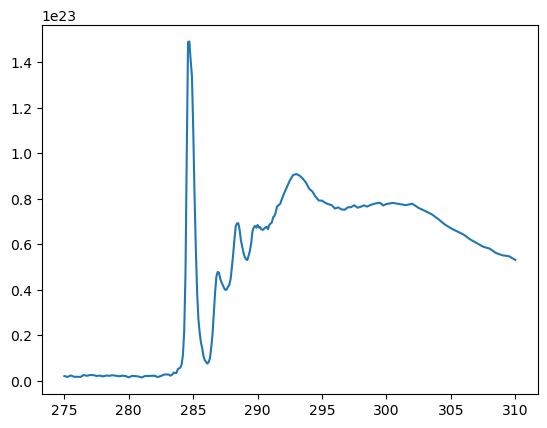

In [18]:
plt.plot(NearEdge_Data[:,0][:-100], NearEdge_Data[:,1][:-100])

In [3]:
## Data inputs
# filename = os.path.join(os.path.split(__file__)[0],'PS_004_-dc.txt')  # full path and filename for experimental data
filename = str(pathlib.Path.cwd().joinpath('PS_004_-dc.txt'))
material_name = 'Polystyrene'
chemical_formula = 'CH'
x_min = 280
x_max = 320

## Calculate the full scattering factor spectra
output = kk.kk_calculate_real(filename,
                              chemical_formula,
                              load_options=None,
                              input_data_type='NEXAFS',
                              merge_points=[x_min, x_max],
                              add_background=False,
                              fix_distortions=False,
                              curve_tolerance=None,
                              curve_recursion=50)

## Calculate Henke atomic scattering factors for comparison
Stoichiometry = kk.data.ParseChemicalFormula(chemical_formula)
ASF_E, ASF_Data = kk.data.calculate_asf(Stoichiometry)
ASF_Data2 = kk.data.coeffs_to_ASF(ASF_E, np.vstack((ASF_Data, ASF_Data[-1])))

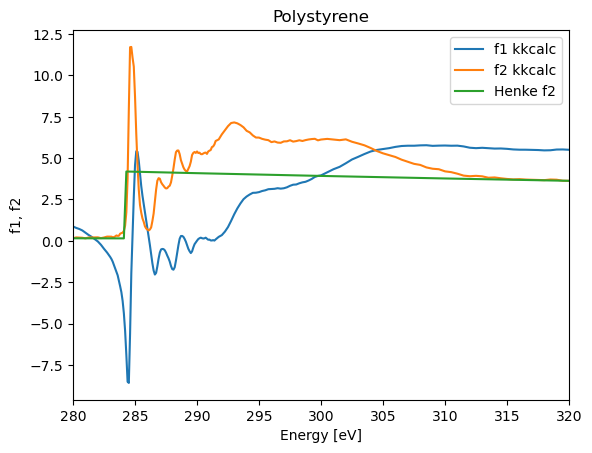

In [4]:
## Plot spectra
plt.figure()
plt.plot(output[:, 0], output[:, 1], label='f1 kkcalc')
plt.plot(output[:, 0], output[:, 2], label='f2 kkcalc')
plt.plot(ASF_E, ASF_Data2, label='Henke f2')
plt.legend()
plt.xlim(x_min, x_max)
plt.title(material_name)
plt.xlabel('Energy [eV]')
plt.ylabel('f1, f2')
plt.show()